In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

from scipy.stats import ttest_1samp
from scipy import stats
import statsmodels.api as sm

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler

In [2]:
# To show all columns
pd.set_option('display.max_columns', None)

# Set the color codes
sns.set(color_codes=True)

In [4]:
reviews = pd.read_csv('reviews_upd.csv')
reviews.head()

,Unnamed: 0,user,rating,comment,ID,name,comment_length,word_count,sentiment
0,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan,52,10,0.033333
1,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan,93,18,0.620000
2,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan,40,8,0.300000
3,11,daredevil,10.0,This is probably the best game I ever played. ...,13,Catan,108,17,0.366667
4,16,hurkle,10.0,Fantastic game. Got me hooked on games all ove...,13,Catan,54,10,0.000000


In [ ]:
""" Check if the sentiment polarity score works """

In [28]:
print('5 random comments with high positive sentiment polarity: \n')
highest = reviews.loc[reviews.sentiment >= 0.75, ['comment']].sample(5).values
for h in highest:
    print(h)

5 random comments with high positive sentiment polarity: 

['Great.']
['Buen juego para introducir a los dungeon crawlers. El juego en si no es muy bueno, pero tiene reglas sencillas y bastante contenido, ideal para novatos (por esto le he subido 1 puntito). Si ya sabes de que van estos juegos, pasa de largo. Las reglas son sencillisimas y el juego es un tiradados']
['Great as a two player. Works well up to 4 players']
["SPACE HULK !!! Awesome, although you need a lota space to set the maps.I think i'm gonna start to set them to the floor to resolve this matter... tik tok.... the timer is running out, the genestealers are going to gets yaaa... :D "]
['3-6 20-35 minutes Best with any']


In [262]:
print('5 random comments with neutral sentiment polarity: \n')
neutral = reviews.loc[reviews.sentiment == 0, ['comment']].sample(5).values
for n in neutral:
    print(n)

5 random comments with neutral sentiment polarity: 

['Unrecorded plays ~ 7']
['http://www.asaboardgamer.com/review/guildhall-fantasy-fellowship/']
['Ok.']
['Kickstarter']
['Came without Threat Assessment: Lava Leaper mission card.']


In [5]:
print('5 random comments with negative sentiment polarity: \n')
negative = reviews.loc[reviews.sentiment == -0.9, ['comment']].sample(5).values
for neg in negative:
    print(neg)

5 random comments with negative sentiment polarity: 

['We *hated* it. Truly hated. ']
['Hated it.']
['I hated this one']
['Terrible. A steaming pile of crap with lots of bells and whistles on it.']
['Crap. Boring. Uninspiring. ']


In [ ]:
""" Comment lenght, samples """

In [56]:
top = reviews.loc[reviews.rating == 10, ['comment_length', 'comment']].sample(5).values
for h in top:
    print(h)

[172
 'I do not think it is possible to love any game more than I love this one.  Every game that I play is completely different from the last, and just as wildly unpredictable.  ']
[86
 'Simple rules for such a rich and rewarding game. Deservedly a classic.  20+  180 mins.']
[75
 'Innovative and exciting gameplay. A new way to play social deduction games!']
[74
 'great game, played in a café a few times. had to buy it. Kids love it too!']
[24 'Overwhelming Awesomeness']


In [15]:
low = reviews.loc[reviews.rating == 1, ['comment_length', 'comment']].sample(5).values
for h in low:
    print(h)

[131
 'Nagyon primitív játék. Ez az 1 pontos játék prototipusa. Kíváncsi lennék, 2200 éve, amikor kialakult, hány éves emberek játszották.']
[21 'multiplayer solitaire']
[25 'No decisions = not a game']
[220
 'Just hate this game. The only redeeming quality is that it looks fairly cool, but don\'t let that fool you! It is just an attempt to suck you in to play one of the worst "games" (if you can even call it that) of all time.']
[31 "It's no Pretty Pretty Princess."]


In [12]:
med = reviews.loc[reviews.rating == 7, ['comment_length', 'comment']].sample(5).values
for h in med:
    print(h)

[243
 'One of my favorite games as a kid that I never had.  A few classic games were released in nice wooden bookshelf editions, and Stratego was one of them.  Really glad my son likes this game.  He usually asks to play it and I usually say yes.  :)']
[125
 'A nice, light game filled with a bit of take-that. It can get a bit nasty, which is surprising considering the elegant theme!']
[42 'Good little filler with a little thinking.']
[435
 '[Schmidt Spiele 2009 edition] {Dice filler; Bingo; scalable} Mosaix is a fun dice game.  This is more like an advanced "Bingo", but this is different enough from "High Score" to make it into my game collection.  This game can be quite brain-teasing and players need to have good pattern recognition skills (esp. they have to rotate the dice patterns in their mind).  A typical game runs around 20 minutes, which makes it a good filler.']
[137
 'A good little card game that sorta reminds me of Coloretto in its combination of quick play, pseudo-card draft

In [17]:
# Top 1000 games (all categories)

top = pd.read_csv('top_games_final.csv')
top_2 = top.drop(columns=['Unnamed: 0'])
top_2.head()

,Name,comment,ID,Year,Rank,Average,Users rated,comment_length,sentiment,averageweight,maxplayers,minage,minplayers,minplaytime,owned,playingtime,stddev,trading,wanting,wishing,yearpublished,boardgamedesigner2,boardgamepublisher2,suggested_language_dependence3,cat1,cat2,cat3,other cat,mech1,mech2,mech3,other mech
0,7 Wonders,10172,68448,2010,45,7.78,68569,204.655525,0.118031,2.3397,7,10,2,30,91037,30,1.27559,1162,1029,9464,2010,Antoine Bauza,"Repos Production, ADC Blackfire Entertainment,...",No necessary in-game text,Ancient,Card Game,City Building,Civilization,Card Drafting,Hand Management,Set Collection,"Simultaneous Action Selection, Variable Playe..."
1,Codenames,5902,178900,2015,59,7.72,50564,165.331244,0.122766,1.3099,8,14,2,15,80742,15,1.28379,752,345,4365,2015,Vlaada Chvátil,"Czech Games Edition, Bergsala Enigma, Boardgam...",Unplayable in another language,Card Game,Deduction,Party Game,"Spies/Secret Agents, Word Game",Memory,Partnerships,Press Your Luck,NaN
2,King of Tokyo,7170,70323,2011,257,7.23,48246,156.707531,0.128590,1.5002,6,8,2,30,69407,30,1.31871,1061,696,5682,2011,Richard Garfield,"IELLO, Bergsala Enigma, Bureau De Juegos, Delt...",Moderate in-game text - needs crib sheet or pa...,Dice,Fighting,Movies / TV / Radio theme,Science Fiction,Area Control / Area Influence,Card Drafting,Dice Rolling,"Player Elimination, Press Your Luck"
3,Love Letter,6753,129622,2012,240,7.26,46666,136.876055,0.136754,1.1957,4,10,2,20,78731,20,1.33300,1048,203,2612,2012,Seiji Kanai,"Alderac Entertainment Group, Kanai Factory, 96...",Some necessary text - easily memorized or smal...,Card Game,Deduction,Renaissance,NaN,Hand Management,Player Elimination,NaN,NaN
4,Splendor,5755,148228,2014,129,7.47,44723,172.070721,0.122012,1.8142,4,10,2,30,61834,30,1.29256,591,785,6131,2014,Marc André,"Space Cowboys, Asmodee, Asterion Press, Boardg...",No necessary in-game text,Card Game,Economic,Renaissance,NaN,Card Drafting,Set Collection,NaN,NaN


In [6]:
# Create bins for playing time  

col = 'playingtime'
conditions = [top_2[col] >= 121, (top_2[col] <= 120) & (top_2[col] >= 61), (top_2[col] <= 60) & (top_2[col] >= 31), top_2[col] <= 30]
choices = [ "4_>= 121", '3_61-120', '2_31-60', '1_<= 30']

top_2["playingtime_cat"] = np.select(conditions, choices, default=np.nan)
top_2

,Name,comment,ID,Year,Rank,Average,Users rated,comment_length,sentiment,averageweight,maxplayers,minage,minplayers,minplaytime,owned,playingtime,stddev,trading,wanting,wishing,yearpublished,boardgamedesigner2,boardgamepublisher2,suggested_language_dependence3,cat1,cat2,cat3,other cat,mech1,mech2,mech3,other mech,playingtime_cat
0,7 Wonders,10172,68448,2010,45,7.78,68569,204.655525,0.118031,2.3397,7,10,2,30,91037,30,1.27559,1162,1029,9464,2010,Antoine Bauza,"Repos Production, ADC Blackfire Entertainment,...",No necessary in-game text,Ancient,Card Game,City Building,Civilization,Card Drafting,Hand Management,Set Collection,"Simultaneous Action Selection, Variable Playe...",1_<= 30
1,Codenames,5902,178900,2015,59,7.72,50564,165.331244,0.122766,1.3099,8,14,2,15,80742,15,1.28379,752,345,4365,2015,Vlaada Chvátil,"Czech Games Edition, Bergsala Enigma, Boardgam...",Unplayable in another language,Card Game,Deduction,Party Game,"Spies/Secret Agents, Word Game",Memory,Partnerships,Press Your Luck,NaN,1_<= 30
2,King of Tokyo,7170,70323,2011,257,7.23,48246,156.707531,0.128590,1.5002,6,8,2,30,69407,30,1.31871,1061,696,5682,2011,Richard Garfield,"IELLO, Bergsala Enigma, Bureau De Juegos, Delt...",Moderate in-game text - needs crib sheet or pa...,Dice,Fighting,Movies / TV / Radio theme,Science Fiction,Area Control / Area Influence,Card Drafting,Dice Rolling,"Player Elimination, Press Your Luck",1_<= 30
3,Love Letter,6753,129622,2012,240,7.26,46666,136.876055,0.136754,1.1957,4,10,2,20,78731,20,1.33300,1048,203,2612,2012,Seiji Kanai,"Alderac Entertainment Group, Kanai Factory, 96...",Some necessary text - easily memorized or smal...,Card Game,Deduction,Renaissance,NaN,Hand Management,Player Elimination,NaN,NaN,1_<= 30
4,Splendor,5755,148228,2014,129,7.47,44723,172.070721,0.122012,1.8142,4,10,2,30,61834,30,1.29256,591,785,6131,2014,Marc André,"Space Cowboys, Asmodee, Asterion Press, Boardg...",No necessary in-game text,Card Game,Economic,Renaissance,NaN,Card Drafting,Set Collection,NaN,NaN,1_<= 30
5,7 Wonders Duel,4791,173346,2015,16,8.12,40305,174.820288,0.145337,2.2310,2,10,2,30,63173,30,1.16566,437,917,6052,2015,Antoine Bauza Bruno Cathala,"Repos Production, ADC Blackfire Entertainment,...",No necessary in-game text,Ancient,Card Game,City Building,Civilization,Card Drafting,Set Collection,NaN,NaN,1_<= 30
6,Scythe,5060,169786,2016,8,8.29,39173,277.293478,0.141040,3.3708,5,14,1,90,51977,115,1.42913,304,1878,13318,2016,Jamey Stegmaier,"Stonemaier Games, Albi, Angry Lion Games, Arcl...",Moderate in-game text - needs crib sheet or pa...,Economic,Fighting,Science Fiction,Territory Building,Area Control / Area Influence,Grid Movement,Variable Player Powers,NaN,3_61-120
7,Lords of Waterdeep,5681,110327,2012,51,7.77,38400,213.806548,0.121668,2.4818,5,12,2,60,47288,120,1.26825,495,1145,7799,2012,Peter Lee Rodney Thompson,Wizards of the Coast,Moderate in-game text - needs crib sheet or pa...,City Building,Fantasy,NaN,NaN,Card Drafting,Set Collection,Take That,Worker Placement,3_61-120
8,Terraforming Mars,4897,167791,2016,4,8.40,38331,279.220543,0.104928,3.2397,5,12,1,120,50512,120,1.36045,227,2074,13038,2016,Jacob Fryxelius,"FryxGames, Arclight, Fantasmagoria, Ghenos Gam...",Moderate in-game text - needs crib sheet or pa...,Economic,Environmental,Industry / Manufacturing,"Science Fiction, Space Exploration, Territory...",Card Drafting,Hand Management,Set Collection,"Take That, Tile Placement, Variable Player Po...",3_61-120
9,The Castles of Burgundy,5420,84876,2011,13,8.13,36476,228.045018,0.117214,3.0147,4,12,2,30,51367,90,1.24116,573,1092,7477,2011,Stefan Feld,"alea, Ravensburger Spieleverlag GmbH, Broadway...",No necessary in-game text,Dice,Medieval,Territory Building,NaN,Dice Rolling,Set Collection,Tile Placement,NaN,3_61-120


In [85]:
### Cat per playing time - All genres

cat = top_2.pivot_table(index='cat1', values = 'Name', columns='playingtime_cat', aggfunc='count', fill_value=0)
cat['total'] = cat.sum(axis=1)
#cat_2 = cat.drop(columns=['nan'])

cat_3 = cat.sort_values('total', ascending=False)
cat_4 = cat_3.iloc[0:10,]
col_names = ['<30', '31-60', '61-120', '>121', 'total']
cat_4.columns = col_names
cat_5 = cat_4.drop(columns=['total'])
cat_5

,<30,31-60,61-120,>121
cat1,,,,
Card Game,95,97,35,4
Adventure,6,31,34,26
Economic,3,16,41,14
Bluffing,36,20,13,4
Dice,18,17,14,1
Animals,20,17,8,2
City Building,8,14,19,5
Ancient,5,9,21,2
Abstract Strategy,18,12,1,1


Text(87.0, 0.5, 'Categories')

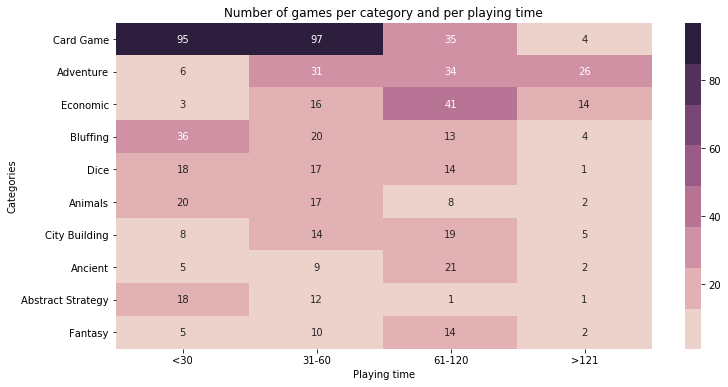

In [87]:
f, ax = plt.subplots(figsize=(12,6))

ax = sns.heatmap(cat_5, cmap=sns.cubehelix_palette(8), annot=True)
ax.set_title('Number of games per category and per playing time')
ax.set_xlabel('Playing time')
ax.set_ylabel('Categories')

In [88]:
### Mechanics per playing time - All genres

mech = top_2.pivot_table(index='mech1', values = 'Name', columns='playingtime_cat', aggfunc='count', fill_value=0)
mech['total'] = mech.sum(axis=1)
#mech_2 = mech.drop(columns=['nan'])

mech_3 = mech.sort_values('total', ascending=False)
mech_4 = mech_3.iloc[0:10,]
col_names = ['<30', '31-60', '61-120', '>121', 'total']
mech_4.columns = col_names
mech_5 = mech_4.drop(columns=['total'])
mech_5

,<30,31-60,61-120,>121
mech1,,,,
Card Drafting,55,68,46,5
Area Control / Area Influence,15,50,57,31
Action Point Allowance System,10,36,54,13
Cooperative Play,21,28,35,9
Dice Rolling,29,27,23,4
Hand Management,35,34,9,2
Auction/Bidding,3,12,14,6
Deck / Pool Building,3,21,7,2
Action / Movement Programming,4,13,8,5


Text(86.99999999999999, 0.5, 'Game mechanics')

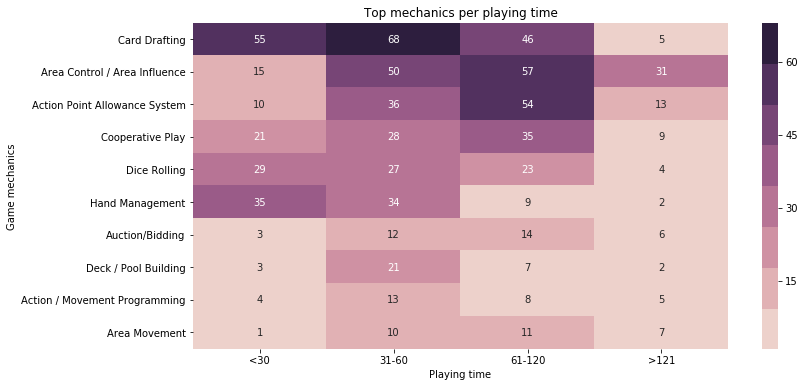

In [89]:
f, ax = plt.subplots(figsize=(12,6))

ax = sns.heatmap(mech_5, cmap=sns.cubehelix_palette(8), annot=True)
ax.set_title('Top mechanics per playing time')
ax.set_xlabel('Playing time')
ax.set_ylabel('Game mechanics')

In [ ]:
""" Q1: What is the correlation between the average rating of a game and the comment length? """

0.3415221984211379


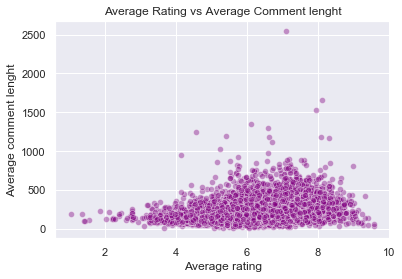

In [24]:
ax = sns.scatterplot('Average', 'comment_length', data = game_info, alpha=.4, color='purple')
ax.set_title('Average Rating vs Average Comment lenght')
ax.set_xlabel('Average rating')
ax.set_ylabel('Average comment lenght')

print(game_info['Average'].corr(game_info['comment_length']))


Text(0.5, 0, 'Comment lenght')

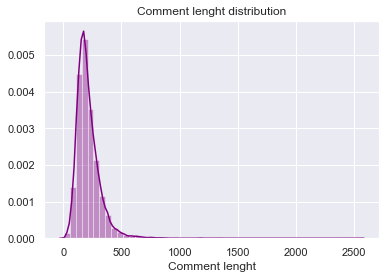

In [25]:
ax5 = sns.distplot(game_info2['comment_length'], color='purple', bins=50).set_title('Comment lenght distribution')
plt.xlabel('Comment lenght')

In [26]:
# H0: Games that have comments with more than 1000 characters will have an average rating 8.

high = game_info2.loc[(game_info2['comment_length'] >= 1000)]

h0 = 8
mean = high['Average'].mean()
stdev = np.std(high['Average'])
size = high['Average'].count()
rating = high['Average']

t_value = (mean - h0) / (stdev / np.sqrt(size))

print(ttest_1samp(rating, h0).pvalue)
print(ttest_1samp(rating, h0).statistic)


0.004757255371255351
-3.524904685004073


In [177]:
high = game_info2.loc[(game_info2['comment_length'] >= 1000)]
high.head()

,Name,comment,ID,Year,Rank,Average,Users rated,comment_length,Good_bad,sentiment,averageweight,maxplayers,minage,minplayers,minplaytime,owned,playingtime,stddev,trading,wanting,wishing,yearpublished,boardgamedesigner2,boardgamecategory2,boardgamemechanic2,boardgamepublisher2,suggested_language_dependence3,Strategy Game Rank,Family Game Rank
608,Alakazoo,3,237927,2018,10640,7.94,30,1533.666667,Good,0.250689,2.2500,4,8,2,30,83,45,1.74285,2,5,29,2018,Marcin Podsiadło,"Animals, Fantasy","Card Drafting, Dice Rolling, Pattern Building,...",CreativeMaker LLC,No necessary in-game text,NaN,NaN
3624,Custer's Luck,14,9968,1985,14458,5.41,44,1191.785714,Bad,0.021818,2.2727,3,12,1,180,202,180,2.09510,10,4,12,1985,Wayne C Close,"American Indian Wars, Fighting, Wargame","Hex-and-Counter, Simulation",3W (World Wide Wargames),NaN,NaN,NaN
4376,Down in Flames: Locked-On,13,29055,2018,6405,8.09,56,1184.461538,Good,0.137145,1.7500,6,10,1,15,189,30,1.53637,3,18,81,2018,Dan Verssen,"Aviation / Flight, Card Game, Modern Warfare, ...",Trick-taking,Dan Verssen Games (DVG),Extensive use of text - massive conversion nee...,NaN,NaN
4525,Drillit! A Fuga da Montanha de Cristal,8,172875,2015,10722,6.59,42,1301.750000,Bad,0.162738,2.5000,4,10,2,30,90,60,1.70673,2,0,10,2015,Pedro Nastari Lucas Pereira,"Adventure, Exploration, Fantasy","Action Point Allowance System, Cooperative Pla...","Penguin Spot, Singu Games",No necessary in-game text,NaN,NaN
5033,Escola de Dragões,2,167718,2014,12737,6.12,33,1345.500000,Bad,0.049548,1.0000,4,8,2,15,66,15,1.84239,1,0,0,2014,Ramsés Sohn,"Card Game, ""Childrens Game"", Educational, Fant...",Card Drafting,RetroPunk Game Design,NaN,NaN,NaN


In [ ]:
""" Q2: What is the correlation between the average rating and the average comment polarity?  """

0.49681172938528084


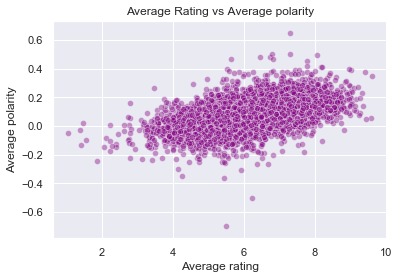

In [27]:
ax = sns.scatterplot('Average', 'sentiment', data = game_info2, alpha=.4, color='purple')
ax.set_title('Average Rating vs Average polarity')
ax.set_xlabel('Average rating')
ax.set_ylabel('Average polarity')

print(game_info2['Average'].corr(game_info2['sentiment']))



Text(0.5, 0, 'Average polarity')

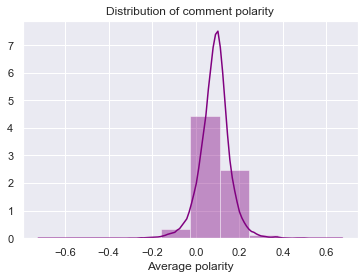

In [28]:
# sentiment distribution

ax = sns.distplot(game_info2['sentiment'], color='purple', bins=10).set_title('Distribution of comment polarity')
plt.xlabel('Average polarity')

Text(0.5, 0, 'Average rating')

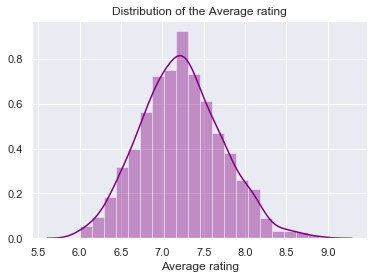

In [38]:
ax1 = sns.distplot(top_2['Average'], color='purple', bins=20).set_title('Distribution of the Average rating')
plt.xlabel('Average rating')

In [29]:
# H0 The average rating for games with polarity higher than 0.5 is 8

high = game_info2.loc[(game_info2['sentiment'] >= 0.5)]

h0 = 8
mean = high['Average'].mean()
stdev = np.std(high['Average'])
size = high['Average'].count()
rating = high['Average']

t_value = (mean - h0) / (stdev / np.sqrt(size))

print(ttest_1samp(rating, h0).pvalue)
print(ttest_1samp(rating, h0).statistic)


0.03628084192393831
-5.106074222834172


In [32]:
# Top 'Family' games

family_6 = pd.read_csv('family_games.csv')
family_6.head(2)

,Unnamed: 0,index,Name,comment,ID,Year,Rank,Average,Users rated,comment_length,Good_bad,sentiment,averageweight,maxplayers,minage,minplayers,minplaytime,owned,playingtime,stddev,trading,wanting,wishing,yearpublished,boardgamedesigner2,boardgamecategory2,boardgamemechanic2,boardgamepublisher2,suggested_language_dependence3,Strategy Game Rank,Family Game Rank,mech1,mech2,mech3,other mech,playingtime_cat
0,20,20,10 Days in the Americas,128,64956,2010,3023,6.66,514,159.820312,Bad,0.152354,1.3684,4,10,2,20,753,30,1.15873,15,62,112,2010,Alan R Moon Aaron Weissblum,"Educational, Travel","Hand Management, Route/Network Building, Tile ...","Out of the Box Publishing, Vennerød Forlag AS",No necessary in-game text,NaN,778.0,Hand Management,Route/Network Building,Tile Placement,NaN,1_<= 30
1,24,24,10' to Kill,170,174476,2015,2845,6.35,990,179.452941,Bad,0.075619,1.6667,4,12,2,10,1625,15,1.37360,52,20,173,2015,Benoit Bannier,"Animals, Bluffing, Deduction, Murder/Mystery","Action / Movement Programming, Memory, Modular...","Arclight, Dude Games, La Boîte de Jeu, Rebel, ...",No necessary in-game text,NaN,838.0,Action / Movement Programming,Memory,Modular Board,"Player Elimination, Secret Unit Deployment",1_<= 30


In [40]:
### Mechanics per playing time - Family games

mech = family_6.pivot_table(index='mech1', values = 'Name', columns='playingtime_cat', aggfunc='count', fill_value=0)
mech['total'] = mech.sum(axis=1)

mech_3 = mech.sort_values('total', ascending=False)
mech_4 = mech_3.iloc[0:10,]
col_names = ['<30', '31-60', '61-120', '>121', 'total']
mech_4.columns = col_names
mech_5 = mech_4.drop(columns=['total'])
mech_5

,<30,31-60,61-120,>121
mech1,,,,
Hand Management,74,42,3,0
Card Drafting,47,51,10,0
Dice Rolling,53,31,6,1
Area Control / Area Influence,20,35,7,0
Action Point Allowance System,13,24,4,0
Cooperative Play,20,11,6,1
Auction/Bidding,5,17,4,0
Set Collection,11,10,0,0
Action / Movement Programming,6,11,0,1


Text(84.45312499999999, 0.5, 'Game mechanics')

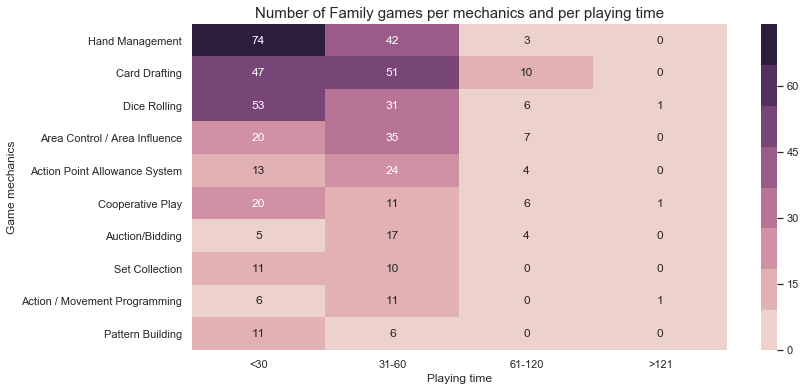

In [41]:
f, ax = plt.subplots(figsize=(12,6))

ax = sns.heatmap(mech_5, cmap=sns.cubehelix_palette(8), annot=True)
ax.set_title('Number of Family games per mechanics and per playing time',fontsize=15)
ax.set_xlabel('Playing time')
ax.set_ylabel('Game mechanics')

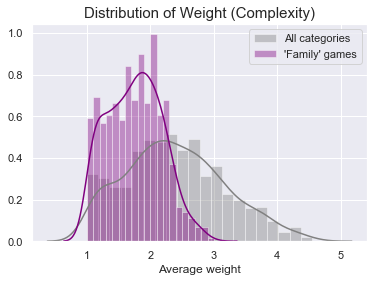

In [86]:
# Weight distribution (All cat / Family games)

ax2 = sns.distplot(top_2['averageweight'], color='grey', bins=20)

ax1 = sns.distplot(family_6['averageweight'], color='purple', bins=20).set_title('Distribution of Weight (Complexity)', fontsize=15)
plt.xlabel('Average weight')
labels = ['All categories', "'Family' games"]
plt.legend(labels)

In [33]:
# Exclude outliers

top_low = top_2[top_2['playingtime'] < 400]

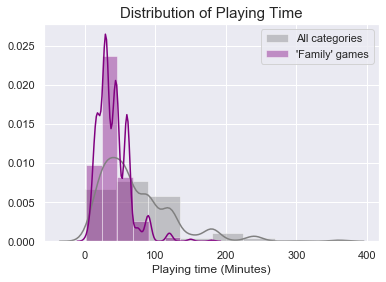

In [34]:
# Playing time distribution (All cat / Family games)

ax3_1 = sns.distplot(top_low['playingtime'], color='grey', bins = 8)
ax3_2 = sns.distplot(family_6['playingtime'], color='purple', bins=8).set_title('Distribution of Playing Time', fontsize=15)
plt.xlabel('Playing time (Minutes)')
labels = ['All categories', "'Family' games"]
plt.legend(labels)

In [76]:
# Add a column to datasets with the average nr of players

top_2['avg_players'] = (top_2['minplayers'] + top_2['maxplayers'])/2
family_6['avg_players'] = (family_6['minplayers'] + family_6['maxplayers'])/2

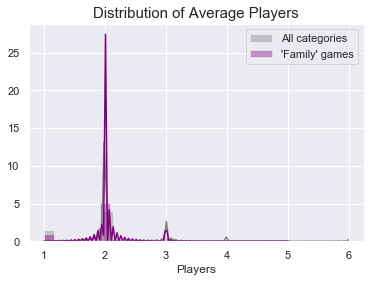

In [84]:
# Averge nr of players distribution (All cat / Family games)

ax4_1 = sns.distplot(top_2['minplayers'], color='grey').set_title('Distribution of min players')
ax4_2 = sns.distplot(family_6['minplayers'], color='purple').set_title('Distribution of Average Players', fontsize=15)
plt.xlabel('Players')
labels =['All categories', "'Family' games"]
plt.legend(labels)

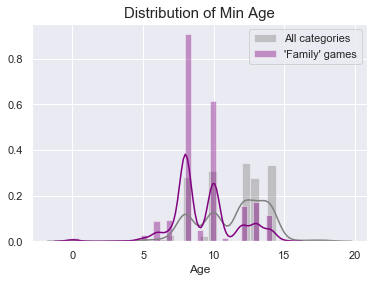

In [83]:
# Min age distribution (All cat / Family games)

ax_age_2 = sns.distplot(top_2['minage'], color='grey')
ax5_2 = sns.distplot(family_6['minage'], color='purple').set_title('Distribution of Min Age', fontsize=15)
plt.xlabel('Age')
labels = ['All categories', "'Family' games"]
plt.legend(labels)

In [35]:
# Language dependency - all categories

lang = pd.DataFrame(top_2.groupby('suggested_language_dependence3')['Name'].count())
lang2 = lang.reset_index()
lang2['reord'] = [4, 3, 1, 2, 5]
lang3 = lang2.sort_values('reord', ascending=True)
lang3

,suggested_language_dependence3,Name,reord
2,No necessary in-game text,378,1
3,Some necessary text - easily memorized or smal...,205,2
1,Moderate in-game text - needs crib sheet or pa...,222,3
0,Extensive use of text - massive conversion nee...,168,4
4,Unplayable in another language,27,5


In [36]:
# Language dependency - family games

lang_fam = pd.DataFrame(family_6.groupby('suggested_language_dependence3')['Name'].count())
lang_fam_2 = lang_fam.reset_index()
lang_fam_2['reord'] = [4, 3, 1, 2, 5]
lang_fam_3 = lang_fam_2.sort_values('reord', ascending=True)
lang_fam_3

,suggested_language_dependence3,Name,reord
2,No necessary in-game text,447,1
3,Some necessary text - easily memorized or smal...,158,2
1,Moderate in-game text - needs crib sheet or pa...,85,3
0,Extensive use of text - massive conversion nee...,22,4
4,Unplayable in another language,9,5


Text(0.5, 1.0, 'Language dependency')

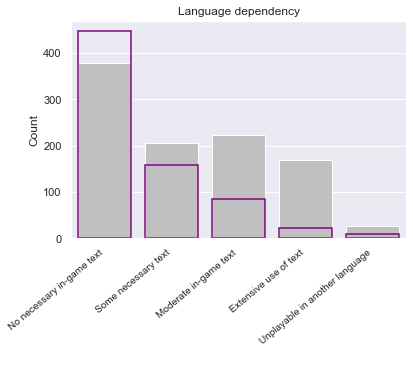

In [37]:
# Language dependency distribution (All cat / Family games)

ax7_1 = sns.barplot(x = 'suggested_language_dependence3', y = 'Name', color='silver', data = lang3, )
ax7_1.set_xticklabels(['No necessary in-game text','Some necessary text', 'Moderate in-game text', 'Extensive use of text', 'Unplayable in another language'], rotation=40, horizontalalignment='right', fontsize=10)

ax7_2 = sns.barplot(x = 'suggested_language_dependence3', y = 'Name', data = lang_fam_3, linewidth=1.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor="purple")
ax7_2.set_xticklabels(['No necessary in-game text','Some necessary text', 'Moderate in-game text', 'Extensive use of text', 'Unplayable in another language'], rotation=40, horizontalalignment='right', fontsize=10)

plt.ylabel('Count')
plt.xlabel(' ')
plt.title('Language dependency')


In [139]:
# Top 10 most rated Family games

features_fam = family_6[['Average', 'Users rated','Name', 'averageweight', 'minage', 'avg_players', 'playingtime', 'suggested_language_dependence3']]
features_fam_2 = features_fam.sort_values('Users rated', ascending = False)
features_fam_3 = features_fam_2.iloc[0:10,]
features_fam_3

col_names = ['Average', 'Users rated', 'Name', 'Averageweight', 'Minage', 'Avg_players', 'Playingtime', 'Language_dependence']
features_fam_3.columns = col_names

In [141]:
#features_fam_3.to_csv('most_rated_family_games.csv')